# Descriptive Statistics

Measures of central tendency include mean, median, and the mode, while the measures of variability include standard deviation, variance, and the interquartile range.

Topic Coverage:
- Mean
- Median
- Mode
- Standard Deviation
- Variance
- Interquartile Range
- Skewness

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('fivethirtyeight')

In [1]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Mean
Mean represents the arithmetic average of the data

In [3]:
df[['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

## Median
Median represents the 50th percentile

In [4]:
df[['Age', 'Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

## Mode
Mode represents the most frequent value of a variable in the data

In [5]:
df[['Age', 'Fare']].mode()

,Age,Fare
0,24.0,8.05


We have discussed the various measures of central tendency. However, as we have seen in the data, the values of these measures differ for many variables. This is because of the extent to which a distribution is stretched or squeezed. In statistics, this is measured by dispersion which is also referred to as variability, scatter, or spread. The most popular measures of dispersion are standard deviation, variance, and the interquartile range.

## Standard deviation
Standard deviation is a measure that is used to quantify the amount of variation of a set of data values from its mean. A low standard deviation for a variable indicates that the data points tend to be close to its mean, and vice versa

In [6]:
df[['Age', 'Fare']].std()

Age     14.526497
Fare    49.693429
dtype: float64

## Variance
Variance is another measure of dispersion. It is the square of the standard deviation and the covariance of the random variable with itself.

In [7]:
df[['Age', 'Fare']].var()

Age      211.019125
Fare    2469.436846
dtype: float64

## The Interquartile Range
The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile)

In [8]:
from scipy.stats import iqr
iqr(df['Fare'])

23.0896

## Skewness
Skewness is the measure of the symmetry, or lack of it, for a real-valued random variable about its mean

- Highly skewed distribution: The skewness value is less than −1 or greater than +1.
- Moderately skewed distribution: The skewness value is between −1 and −½ or between +½ and +1.
- Approximately symmetric distribution: The skewness value is between −½ and +½.

In [9]:
df[['Age', 'Fare']].skew()

Age     0.389108
Fare    4.787317
dtype: float64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Confidence Intervals

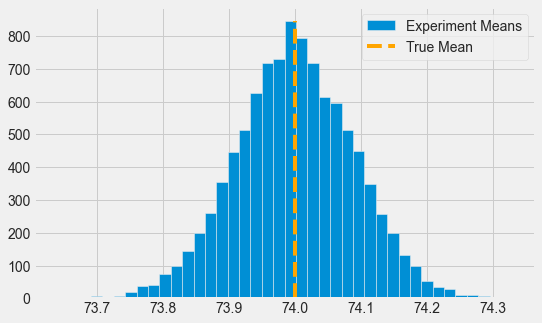

In [19]:
np.random.seed(42)
true_std = 2
true_mean = 74

def run_experiment(n):
    return np.random.normal(true_mean,true_std, n)

n = 500
x = [run_experiment(n).mean() for _ in range(10000)]

plt.figure(figsize=(8,5))
freq, bins, img = plt.hist(x, bins=40, label="Experiment Means")
plt.vlines(true_mean, ymin=0, ymax=freq.max(), linestyles="dashed", label="True Mean", color="orange")
plt.legend()

In [21]:
np.random.seed(321)
exp_data = run_experiment(n)
exp_se = exp_data.std() / np.sqrt(len(exp_data))
exp_mu = exp_data.mean()
ci = (exp_mu - 2 * exp_se, exp_mu + 2 * exp_se)
print(ci)

(73.82718114045632, 74.17341543460314)


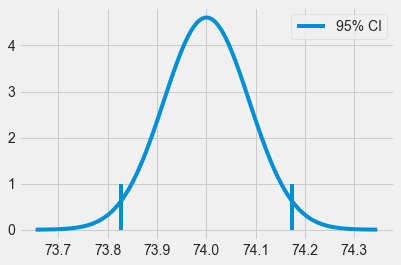

In [25]:
from scipy import stats

x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="95% CI")
plt.legend()
plt.show()